In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
## folders
input_files_folder = '../../fred_input_files'

## Parameters
alpha = 0.05

In [66]:
df_mun_info = pd.read_csv('/zine/HPC02S1/ex-dveloza/AGORA/apps/synthetic_populations/data/processed_data/geodata/geoinfo_municipios_colombia.csv')[['COD_DEPTO','NOM_DEPART']].drop_duplicates()

In [68]:
## Load known info
# Load and preprocess data
df_facemask_11 = pd.read_csv(f'{input_files_folder}/facemask/facemask_timeseries_compliance.csv')
df_facemask_11_ = df_facemask_11.copy()
df_facemask_11['Date'] = pd.to_datetime(df_facemask_11['Date'])
df_facemask_11 = df_facemask_11[['Date', 'FacemaskTrends']]

df_mobility_11 = pd.read_csv(f'{input_files_folder}/mobility_trends/11_mobility_trends.csv')
df_mobility_11['date'] = pd.to_datetime(df_mobility_11['date'])
df_mobility_11['mobility_trend'] = 1 + df_mobility_11['mobility_trend'].ewm(alpha=alpha).mean()

df_combined_11 = pd.merge(df_facemask_11, df_mobility_11, left_on='Date', right_on='date', how='inner')

# Drop rows with NaN values created by lagging
df_combined_11.dropna(inplace=True)

In [70]:
depart_list = df_mun_info.COD_DEPTO.unique()

In [92]:
for dept in depart_list:
    if dept == 999:
        continue

    # Load mobility data for another population (e.g., population 8)
    df_mobility_8 = pd.read_csv(f'{input_files_folder}/mobility_trends/{dept}_mobility_trends.csv')
    df_mobility_8['date'] = pd.to_datetime(df_mobility_8['date'])
    df_mobility_8['mobility_trend'] = 1 + df_mobility_8['mobility_trend'].ewm(alpha=alpha).mean()

    df_combined_88 = pd.merge(df_facemask_11, df_mobility_8, left_on='Date', right_on='date', how='inner')

    # Drop rows with NaN values created by lagging
    df_combined_88.dropna(inplace=True)

    a1 = (df_combined_11['mobility_trend'].ewm(alpha=alpha).mean())
    a2 = (df_combined_88['mobility_trend'].ewm(alpha=alpha).mean())

    frac = a2 / a1
    facemask_estimation = frac * df_combined_11['FacemaskTrends'].to_numpy()

    df_ = pd.DataFrame({'Date':df_facemask_11_.Date,
                        'Day':df_facemask_11_.Day,
                        'FacemaskTrends':facemask_estimation / max(facemask_estimation)})

    df_.to_csv(f'{input_files_folder}/facemask/{dept}_facemask.csv', index=False)

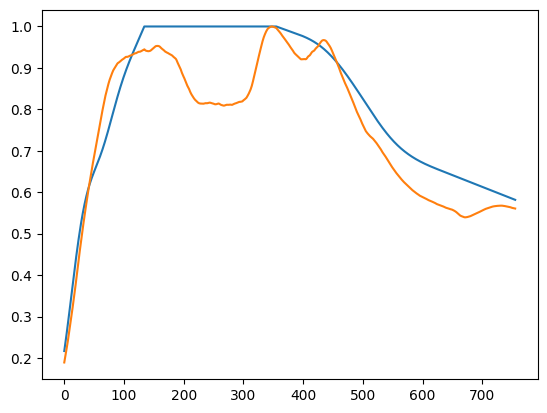

In [93]:
plt.plot(df_combined_11['FacemaskTrends'].to_numpy())
plt.plot(df_.FacemaskTrends)

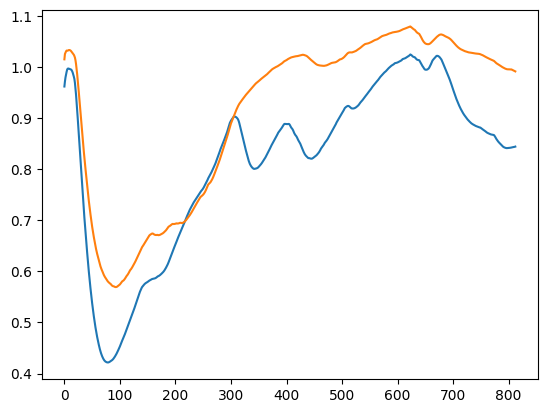

In [78]:
plt.plot(df_mobility_11['mobility_trend'].ewm(alpha=alpha).mean())
plt.plot(df_mobility_8['mobility_trend'].ewm(alpha=alpha).mean())

In [4]:
# import pandas as pd
# from pandas import ExcelFile
# import numpy as np
# from statsmodels.gam.api import GLMGam, BSplines
# from datetime import timedelta

In [56]:
# old_facemask_file = '/zine/HPC02S1/ex-dveloza/AGORA/apps/fred_colombia_implementation/data/2020_facemask_timeseries_compliance.csv'
# df_old_timeseries = pd.read_csv(old_facemask_file)

In [95]:
# df_old_timeseries

In [96]:
# # Number of days to forecast
# num_forecast_days = 120

# # Load data
# facemask_data_file = '/zine/HPC02S1/ex-dveloza/AGORA/apps/fred_colombia_implementation/data/Base consolidada Boletines corte 26 11 2021.xlsx'
# data_facemask = pd.read_excel(facemask_data_file, engine='openpyxl')


# # Rename columns and group information by day of report
# df_facemask_data = data_facemask.rename(columns={
#     'Fecha de recolección': 'dia',
#     'P. Tapabocas Bien p': 'personas_bien',
#     'P. Tapabocas Mal p': 'personas_mal',
#     'Personas  Sin tapabocas': 'personas_no_tapa',
#     'V. Tapabocas Bien p': 'vendedor_bien',
#     'V. Tapabocas mal  p': 'vendedor_mal',
#     'Vendedores sin tapabocas ': 'vendedor_no_tapa'
# }).loc[:, ['dia', 'personas_bien', 'personas_mal', 'personas_no_tapa', 'vendedor_bien', 'vendedor_mal', 'vendedor_no_tapa']]
# df_facemask_data = df_facemask_data.groupby('dia').sum().reset_index()

# # Calculate totals and trends
# df_facemask_data['total_personas'] = df_facemask_data['personas_bien'] + df_facemask_data['personas_mal'] + df_facemask_data['personas_no_tapa']
# df_facemask_data['total_vendedores'] = df_facemask_data['vendedor_bien'] + df_facemask_data['vendedor_mal'] + df_facemask_data['vendedor_no_tapa']
# df_facemask_data['tendencia_personas'] = df_facemask_data['personas_bien'] / df_facemask_data['total_personas']
# df_facemask_data['tendencia_vendedores'] = df_facemask_data['vendedor_bien'] / df_facemask_data['total_vendedores']
# df_facemask_data['tendencia_total'] = (df_facemask_data['personas_bien'] + df_facemask_data['vendedor_bien']) / (df_facemask_data['total_personas'] + df_facemask_data['total_vendedores'])
# df_facemask_data['num_dias'] = (pd.to_datetime(df_facemask_data['dia']) - pd.to_datetime(df_facemask_data['dia'].iloc[0])).dt.days



In [97]:
# # Fit
# x = df_facemask_data['num_dias']
# y = df_facemask_data['tendencia_total']

In [98]:
# from pygam import LinearGAM, s

In [99]:
# # Fitting a GAM
# gam = LinearGAM(s(0, n_splines=10)).fit(df_facemask_data['num_dias'], df_facemask_data['tendencia_total'])

# # Making predictions
# df_fit = pd.DataFrame({'num_dias': range(0, df_facemask_data['num_dias'].max() + num_forecast_days + 1)})
# df_fit['FacemaskTrends'] = gam.predict(df_fit['num_dias'])
# df_fit = df_fit.merge(df_facemask_data[['num_dias', 'tendencia_total']], on='num_dias', how='left')
# df_fit['Date'] = pd.to_datetime(df_facemask_data['dia'].iloc[0]) + pd.to_timedelta(df_fit['num_dias'], unit='D')

In [100]:
# plt.plot(df_fit.Date, df_fit.tendencia_total)
# plt.plot(df_fit.Date, df_fit.FacemaskTrends)

In [101]:
# # Convert 'Date' in df_old_timeseries from string to datetime if necessary
# df_old_timeseries['Date'] = pd.to_datetime(df_old_timeseries['Date'])

# # Calculate the number of missing days
# num_missing_days = (df_fit['Date'].iloc[-1] - df_old_timeseries['Date'].iloc[0]).days

# # Create a complete timeline from the start of the old data to the end of the forecast
# all_days = pd.date_range(start=df_old_timeseries['Date'].iloc[0], periods=num_missing_days + 1, freq='D')

# # Create a new DataFrame to hold the complete timeseries
# df_timeseries = pd.DataFrame({'Date': all_days})
# df_timeseries['FacemaskTrends'] = np.nan

# # Merge old timeseries data where applicable
# for i, row in df_timeseries.iterrows():
#     if row['Date'] in df_old_timeseries['Date'].values:
#         df_timeseries.at[i, 'FacemaskTrends'] = df_old_timeseries.loc[df_old_timeseries['Date'] == row['Date'], 'FacemaskTrends'].values[0]

# # Merge new fit data where applicable, normalizing by the first value of df_fit['FacemaskTrends']
# df_fit_normalized = df_fit.copy()
# df_fit_normalized['FacemaskTrends'] = df_fit['FacemaskTrends'] / df_fit['FacemaskTrends'].iloc[0]

# for i, row in df_timeseries.iterrows():
#     if row['Date'] in df_fit_normalized['Date'].values:
#         df_timeseries.at[i, 'FacemaskTrends'] = df_fit_normalized.loc[df_fit_normalized['Date'] == row['Date'], 'FacemaskTrends'].values[0]

# # Fill missing 'FacemaskTrends' values with 1 (assuming this is the normalization factor)
# df_timeseries['FacemaskTrends'].fillna(1, inplace=True)

# # Add additional columns as per the original script
# df_timeseries['State'] = 'bogota'
# df_timeseries['Day'] = np.arange(1, num_missing_days + 2)

In [103]:
# plt.plot(df_timeseries.FacemaskTrends)

# plt.plot(df_fit.tendencia_total)
# plt.plot(df_fit.FacemaskTrends)